# Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [6]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

,count
status,
1,147
0,48


1 --> Parkinson's Positive

0 --> Healthy

### EDA

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

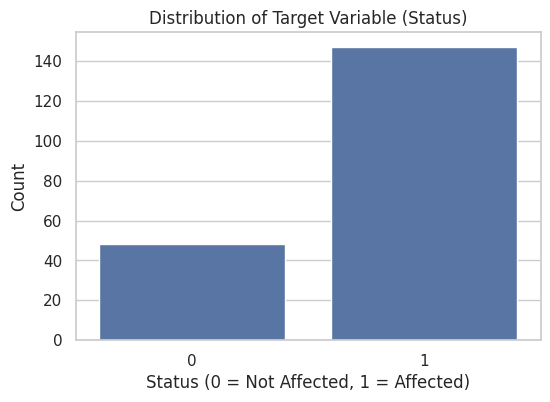

In [9]:
# Set the style for Seaborn
sns.set(style='whitegrid')

# 1. Distribution of the target variable (status)
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=parkinsons_data)
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status (0 = Not Affected, 1 = Affected)')
plt.ylabel('Count')
plt.show()

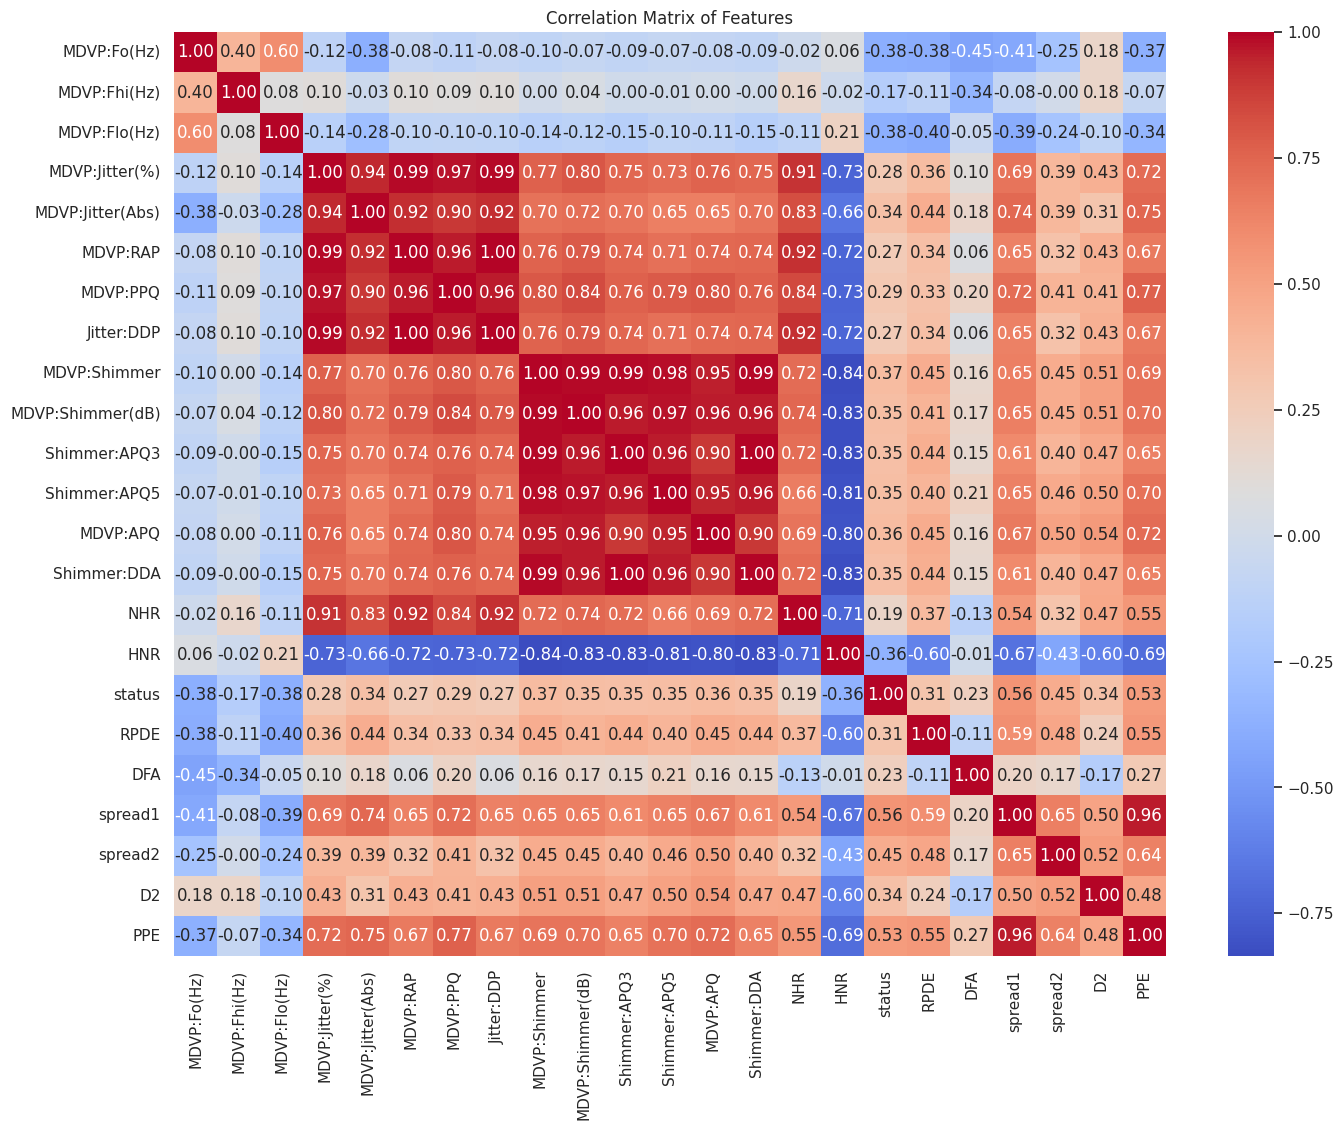

In [12]:
# 2. Correlation heatmap of all features with 'status'
plt.figure(figsize=(16, 12))
numerical_data = parkinsons_data.drop(columns=['name'])
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

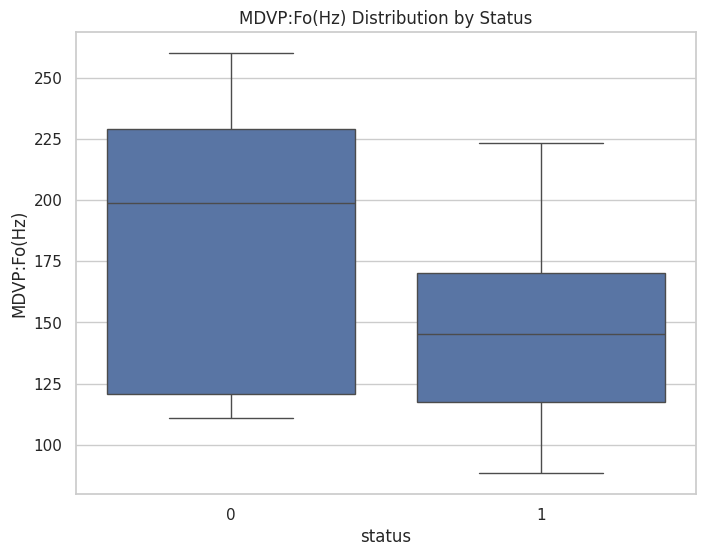

In [14]:
# 3. Distribution of features for both classes

# MDVP:Fo(Hz) vs. Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data= parkinsons_data)
plt.title('MDVP:Fo(Hz) Distribution by Status')
plt.show()

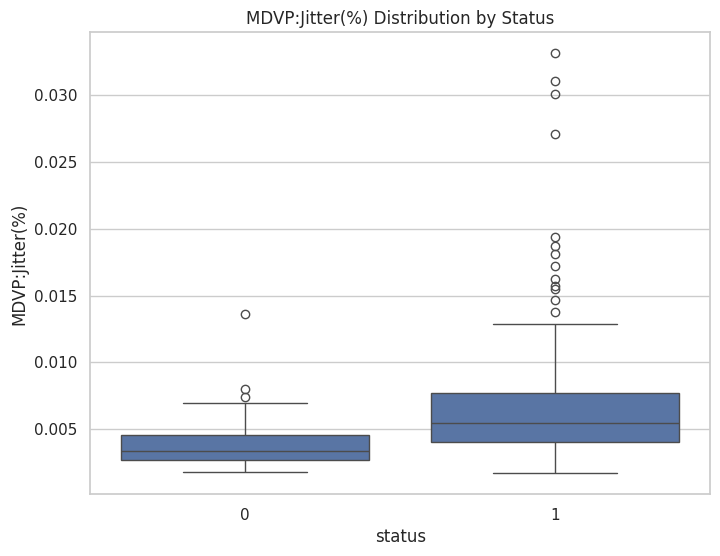

In [15]:
# MDVP:Jitter(%) vs. Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=parkinsons_data)
plt.title('MDVP:Jitter(%) Distribution by Status')
plt.show()

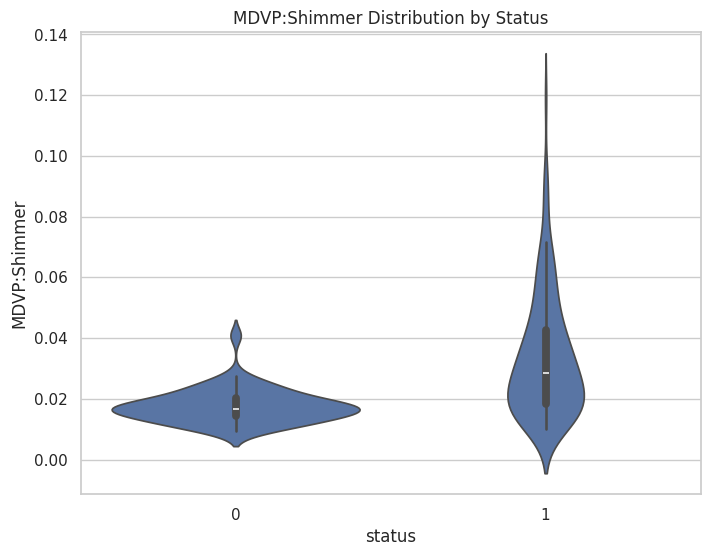

In [17]:
# MDVP:Shimmer vs. Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='status', y='MDVP:Shimmer', data=parkinsons_data)
plt.title('MDVP:Shimmer Distribution by Status')
plt.show()

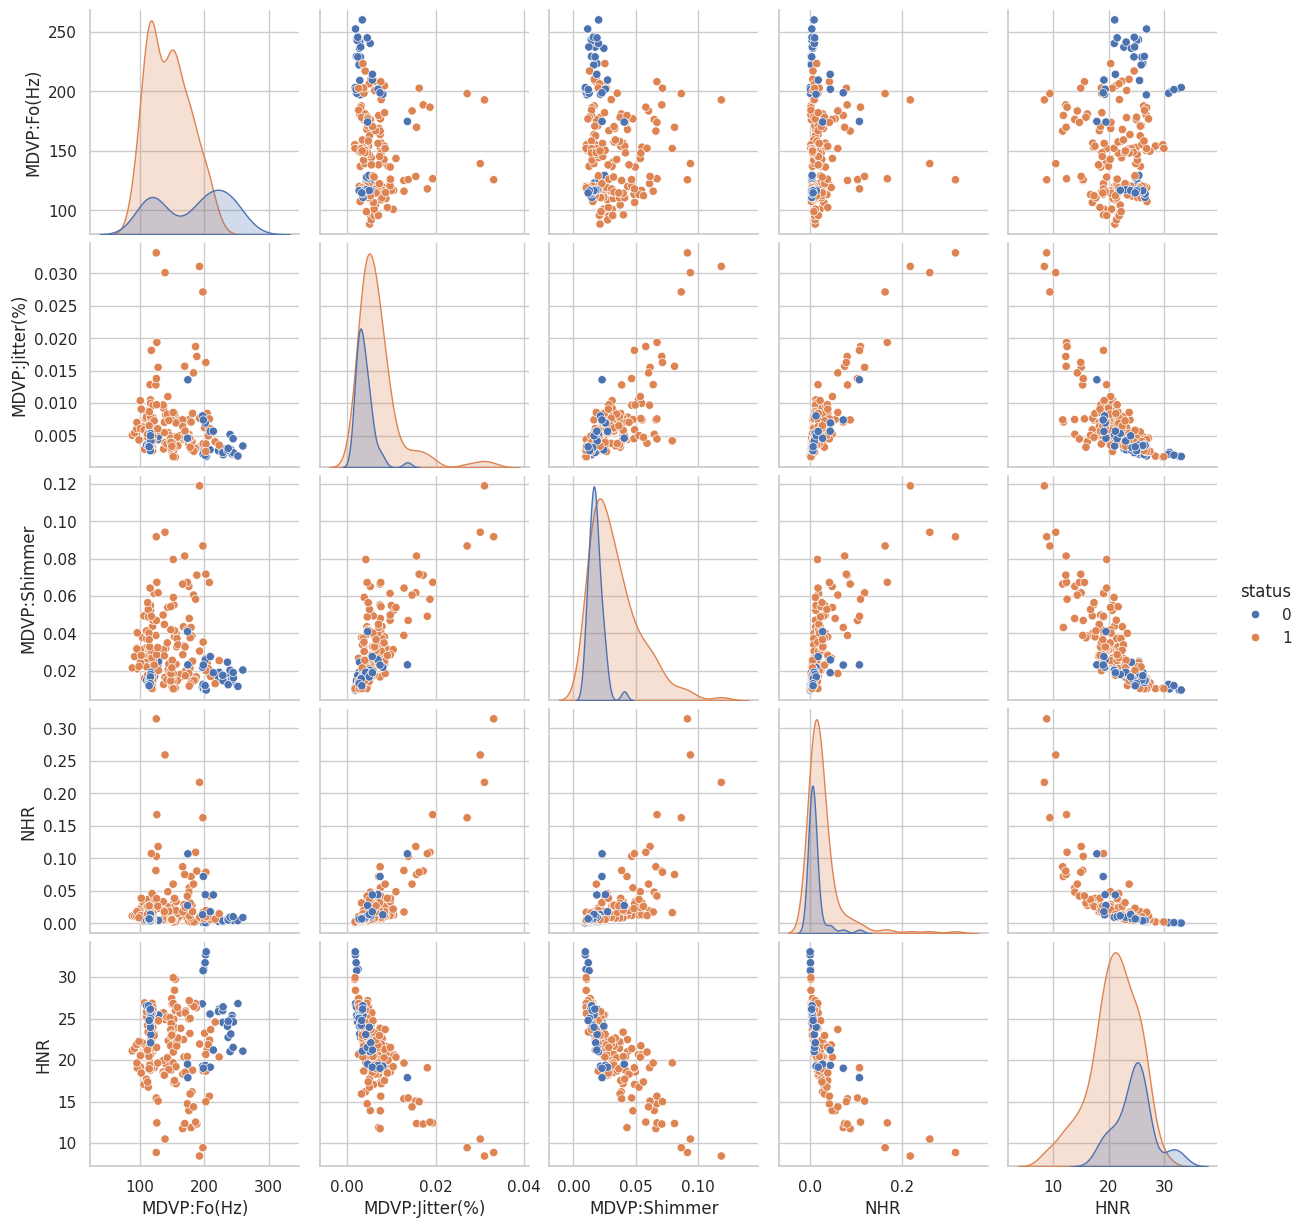

In [20]:
# 4. Pairplot to visualize relationships between key features and target
important_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR']

sns.pairplot(parkinsons_data, hue='status', vars=important_features, height=2.5)
plt.show()

# Insights

1. The dataset shows significant class imbalance, with 140 affected (1) and 40 not affected (0), which could bias model predictions.
2. MDVP
(%) and MDVP
values are higher in the affected group, indicating potential vocal irregularities associated with the condition.
3. Outliers in the affected group may provide valuable information but require careful handling in modeling.
4. Consider using resampling techniques or class weights to address class imbalance in the dataset.
Strong differences in key features suggest they should be prioritized in model development and evaluation.







# Building the model

In [22]:
parkinsons_data
# Define features and target variable
X = parkinsons_data.drop(['name', 'status'], axis=1)  # Drop non-feature columns
y = parkinsons_data['status']

In [23]:
# Handle class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [25]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Create ensemble model using RandomForest, GradientBoosting, and LogisticRegression
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


In [27]:
# Create a voting classifier
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')


In [31]:
# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate the model on training data
y_train_pred = ensemble_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on testing data
y_test_pred = ensemble_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [32]:
# Print the accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.00
Testing Accuracy: 0.97

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [35]:
# Access the trained RandomForestClassifier from the ensemble model
trained_rf = ensemble_model.estimators_[0]  # Assuming 'rf' is the first estimator

# Visualize feature importance using the trained rf
feature_importances = trained_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

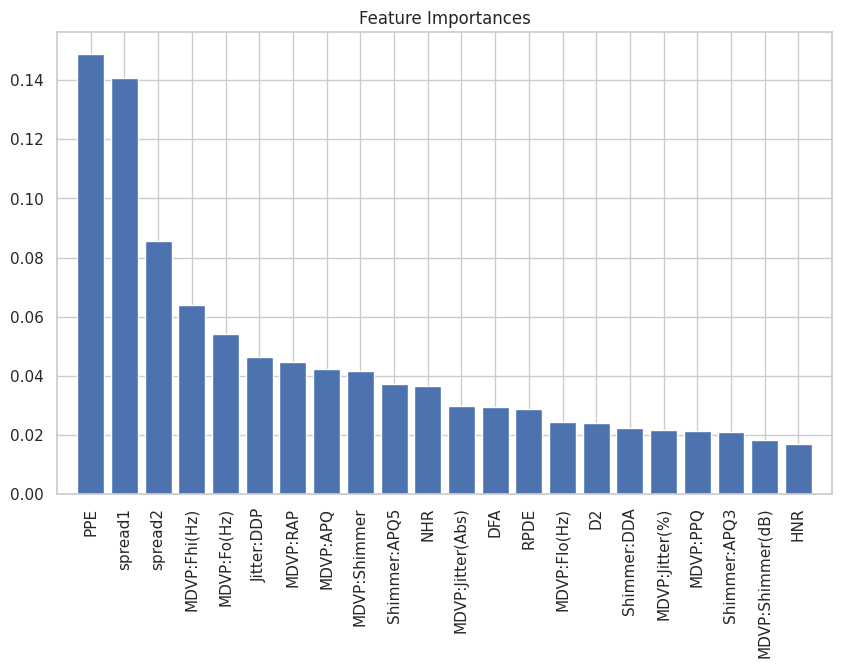

In [36]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# Making a predictive system

In [38]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = ensemble_model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons


# Saving the model

In [40]:
# Saving the trained model

import pickle

filename = 'parkinsons_model.sav'
pickle.dump(ensemble_model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))